In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [32]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read and Cleaning data




In [33]:
nyc_data = pd.read_csv('/content/drive/My Drive/Data Science/Airbnb Price Prediction/AB_NYC_2019.csv')
nyc_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [34]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [35]:
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Kita akan melakukan cleaning dengan mengisi missing data dengan mean. Karena tipe data name, host_name, dan last_review bukan int maka akan di drop. Dan reviews_per_month akan di isi dengan mean.

In [36]:
nyc_data_cp = nyc_data.copy()
nyc_data_cp['reviews_per_month'].fillna(nyc_data_cp['reviews_per_month'].mean(),
                                        inplace=True)
nyc_data_cp.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
nyc_data_cp.fillna({'name':'Not Name'}, inplace = True)
nyc_data_cp.fillna({'host_name':'Not Host Name'}, inplace = True)
nyc_data_cp.fillna({'last_review':'Not Review'}, inplace = True)

In [38]:
nyc_data_cp = nyc_data_cp.dropna()
nyc_data_cp.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#TEST

In [39]:
nyc_data_cp.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Review,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


Text(0.5, 1.0, 'Price vs Neghbourhood vs Room Type')

<Figure size 1800x1584 with 0 Axes>

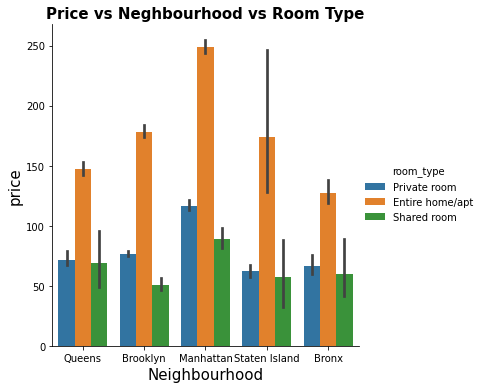

In [40]:
plt.figure(figsize = (25,22))
sns.catplot(x='neighbourhood_group',y='price', hue='room_type',
            data=nyc_data_cp.sort_values(
            by='price' ,ascending=False, axis=0,  
            ),kind='bar')

plt.xlabel('Neighbourhood' , size=15)
plt.ylabel('price' , size=15)
plt.title('Price vs Neghbourhood vs Room Type' , size = 15, weight = 'bold')

Harga tergantung dari tipe kamar dan tempat tersebut berada dimana.

<Figure size 1800x1584 with 0 Axes>

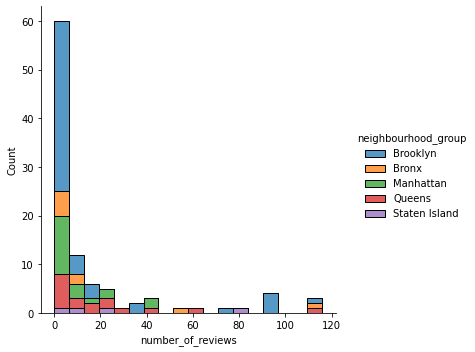

In [41]:
plt.figure(figsize = (25,22))
sns.displot (data=nyc_data_cp.sort_values(by='price',ascending=True, axis=0).head(100), 
                 x='number_of_reviews', 
                 hue='neighbourhood_group', multiple='stack')

In [42]:
nyc_data_cp.sort_values(by='price',ascending=False, axis=0)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.040000,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.160000,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,Not Review,1.373221,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,Not Review,1.373221,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.140000,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.150000,1,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.350000,6,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.560000,4,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.110000,6,333


Jumlah review tergantung dari harga kamar dan tipe kamar tersebut. Dapat dilihat tipe Private Room lebih banyak di review dan harganya juga relatif lebih murah.

Text(0.5, 1.0, 'Price vs minimum_nights vs Room Type')

<Figure size 1800x1584 with 0 Axes>

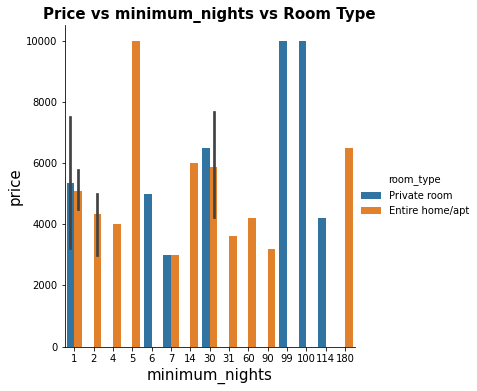

In [43]:
plt.figure(figsize = (25,22))

sns.catplot(x='minimum_nights',y='price', hue='room_type',
            data=nyc_data_cp.sort_values(
            by='price' ,ascending=False, axis=0,  
            ).head(50),kind='bar')

plt.xlabel('minimum_nights' , size=15)
plt.ylabel('price' , size=15)
plt.title('Price vs minimum_nights vs Room Type' , size = 15, weight = 'bold')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 100 Minimum Nights')

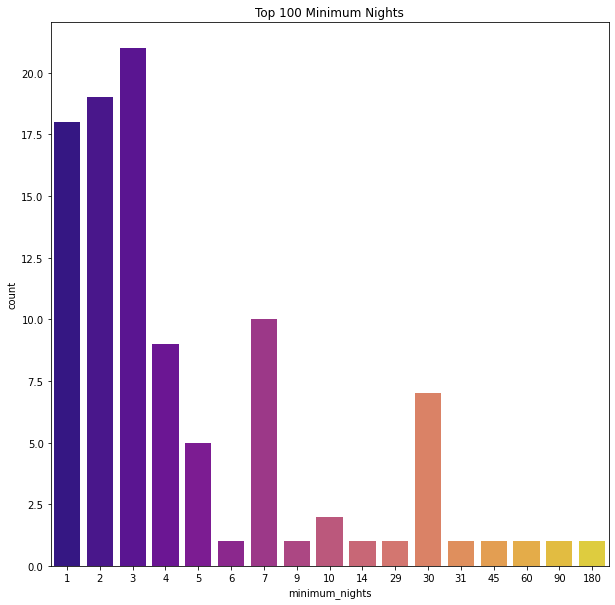

In [44]:
sns.countplot(nyc_data_cp['minimum_nights'].head(100), palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Top 100 Minimum Nights')

Text(0.5, 1.0, 'Neighbourhood vs Price vs Room Type')

<Figure size 1800x1584 with 0 Axes>

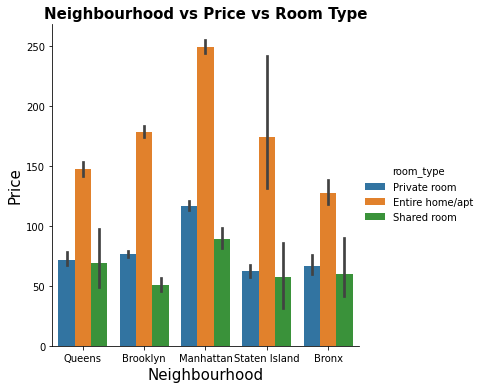

In [45]:
plt.figure(figsize = (25,22))
sns.catplot(x='neighbourhood_group',y='price', hue='room_type',
            data=nyc_data_cp.sort_values(
            by='price' ,ascending=False, axis=0,  
            ),kind='bar')

plt.xlabel('Neighbourhood' , size=15)
plt.ylabel('Price' , size=15)
plt.title('Neighbourhood vs Price vs Room Type' , size = 15, weight = 'bold')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 100 Minimum Nights')

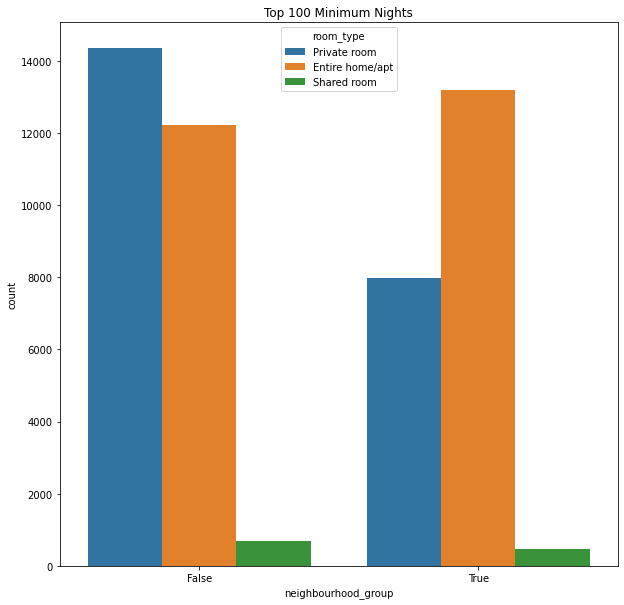

In [46]:
sns.countplot(nyc_data_cp['neighbourhood_group']=='Manhattan', hue=nyc_data_cp['room_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Top 100 Minimum Nights')

In [52]:
nyc_data_cp['neighbourhood_group']=='Manhattan'.count()

TypeError: ignored

#Normalisasi

Normalisasi yang digunakan adalah z score

In [53]:
nyc_data_cp2 = nyc_data_cp.sort_values(by='price', ascending=True, axis=0)
nyc_data_cp2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28


Karena di kolom price ada harga 0 nanti ketika dibagi tidak akan bisa, maka akan dilakukan transformasi log+1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

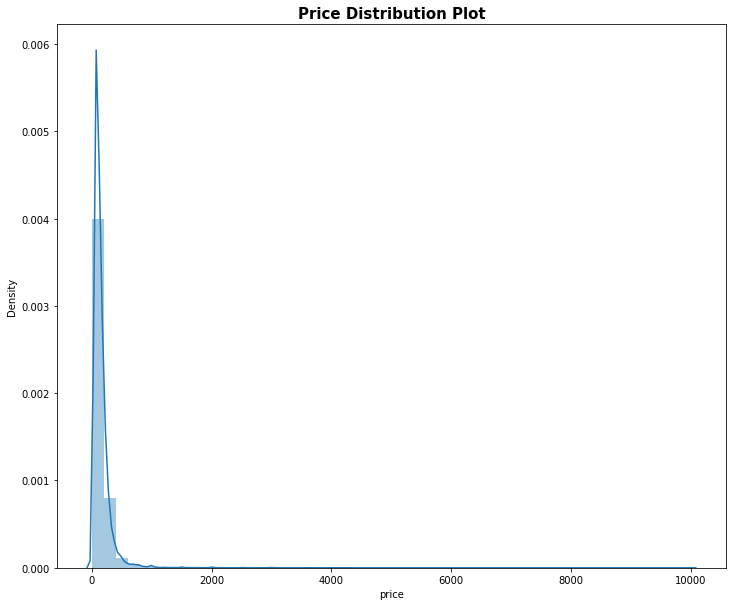

In [54]:
plt.figure(figsize=(12,10))
sns.distplot(nyc_data_cp2['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

In [55]:
#transformasi log+1
nyc_data_cp2['price_log'] = np.log(nyc_data_cp2.price+1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

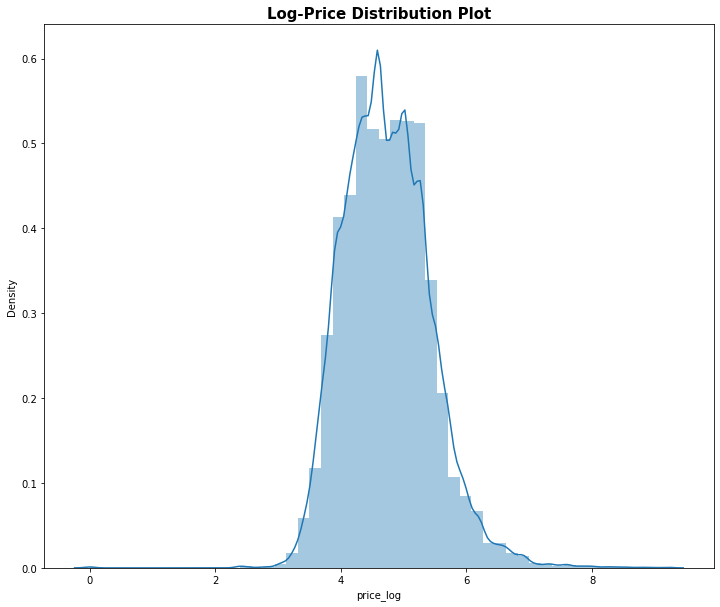

In [56]:
plt.figure(figsize=(12,10))
sns.distplot(nyc_data_cp2['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [57]:
nyc_data_cp2['price_log'].head(100)

25796    0.000000
25634    0.000000
25433    0.000000
25753    0.000000
23161    0.000000
           ...   
28517    3.135494
20779    3.135494
34153    3.135494
21209    3.135494
22050    3.135494
Name: price_log, Length: 100, dtype: float64

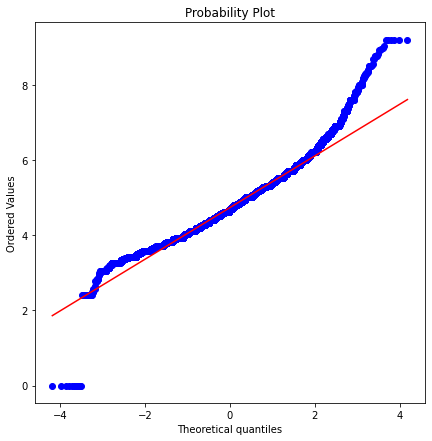

In [58]:
from scipy import stats
plt.figure(figsize=(7,7))
stats.probplot(nyc_data_cp2['price_log'], plot=plt)
plt.show()

**Feature Selection**

Mendrop kolom yang tidak terpakai

In [59]:
nyc_model = nyc_data_cp2.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [60]:
nyc_model

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,1,95,4.350000,6,222,0.00000
25634,Brooklyn,Bushwick,40.69467,-73.92433,Private room,2,16,0.710000,5,0,0.00000
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,2,55,2.560000,4,127,0.00000
25753,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,2,12,0.530000,2,0,0.00000
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,4,1,0.050000,4,28,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
40433,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,30,0,1.373221,1,365,9.21034
12342,Manhattan,Lower East Side,40.71355,-73.98507,Private room,99,6,0.140000,1,83,9.21034
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,5,5,0.160000,1,0,9.21044
9151,Queens,Astoria,40.76810,-73.91651,Private room,100,2,0.040000,1,0,9.21044


#TRAIN

merubah data categorical menjadi data numerik

In [61]:
nyc_model.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_log'],
      dtype='object')

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)
train_x = np.asarray(nyc_model[['price_log']])
train_y = np.asarray(nyc_model[['number_of_reviews']])
regr.fit(train_x, train_y)
print('Coeffisient : ', regr.coef_)
print('Intercept : ', regr.intercept_)
print('Prediction (Yhat) : ', regr.predict(train_x))

Coeffisient :  [[-2.74223579]]
Intercept :  [36.26412047]
Prediction (Yhat) :  [[36.26412047]
 [36.26412047]
 [36.26412047]
 ...
 [11.00692127]
 [11.00692127]
 [11.00692127]]


In [63]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['price_log']])
test_y = np.asanyarray(test[['number_of_reviews']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (RMSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

NameError: ignored

Text(0, 0.5, 'number_of_reviews')

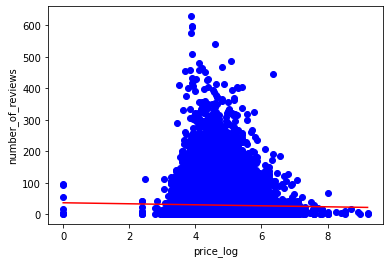

In [ ]:
plt.scatter(train.price_log, train.number_of_reviews,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("price_log")
plt.ylabel("number_of_reviews")

TRAIN Linear Regresion 2


In [ ]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#TRAIN 2

In [65]:
nyc_model2 = nyc_data_cp2.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review'])
nyc_model2.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [66]:
nyc_model2['neighbourhood_group']= nyc_model['neighbourhood_group'].astype("category").cat.codes
nyc_model2['neighbourhood'] = nyc_model['neighbourhood'].astype("category").cat.codes
nyc_model2['room_type'] = nyc_model['room_type'].astype("category").cat.codes
nyc_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 25796 to 29238
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  price_log                       48895 non-null  float64
dtypes: float64(4), int16(1), int

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x, y = nyc_model2.iloc[:,:-1], nyc_model2.iloc[:,-1]
scaler = StandardScaler()
df_model_x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [68]:
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)
print('lr_prediction : ', lr_pred)

lr_prediction :  [4.18305248 5.16322609 4.21643156 ... 5.41950824 4.7615669  5.42706002]


In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

MAE: 0.290306
RMSE: 0.391646
R2 0.683121


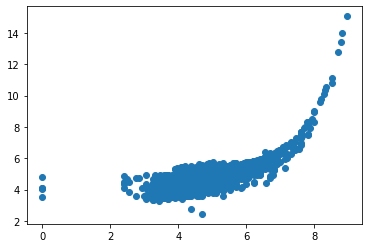

In [74]:
plt.scatter(y_test, lr_pred )

#Deep Learning

In [75]:
nyc_deep = nyc_data_cp.copy()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

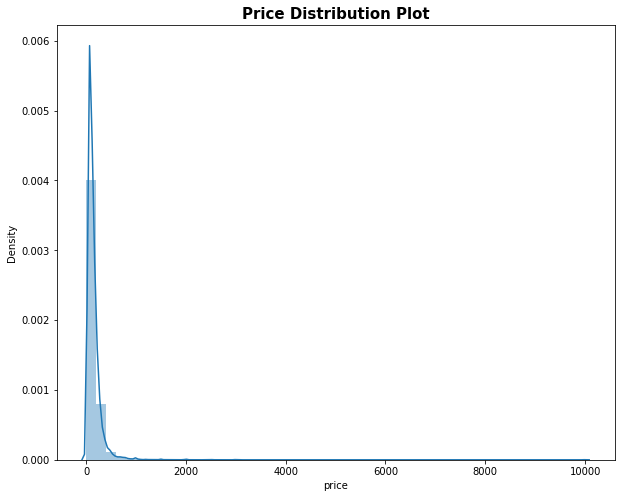

In [76]:
plt.figure(figsize=(10,8))
sns.distplot(nyc_deep['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

In [77]:
#transformasi log+1
nyc_deep['price_log'] = np.log(nyc_deep.price+1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

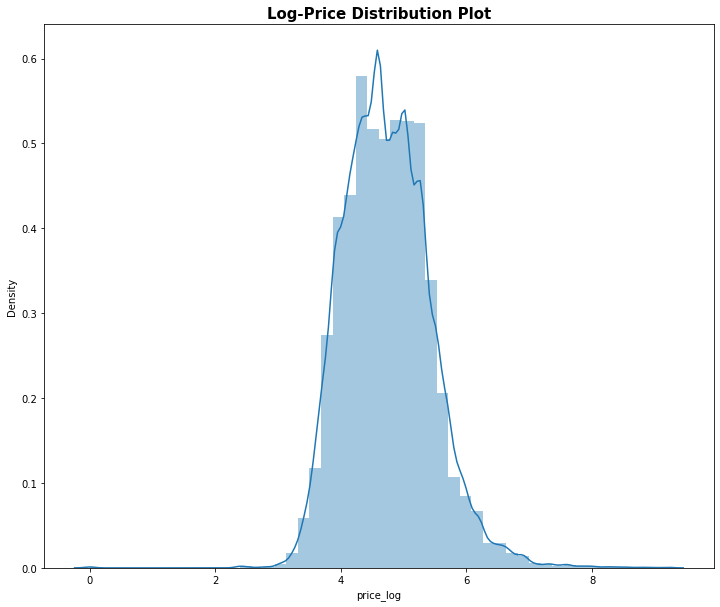

In [78]:
plt.figure(figsize=(12,10))
sns.distplot(nyc_deep['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

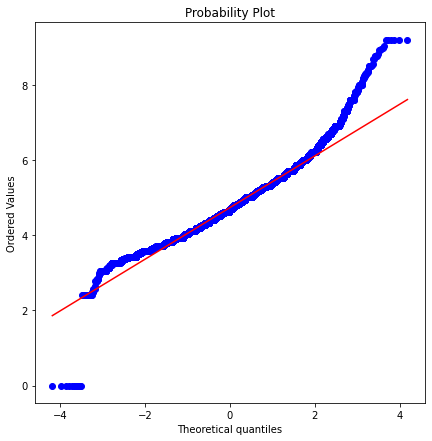

In [79]:
from scipy import stats
plt.figure(figsize=(7,7))
stats.probplot(nyc_deep['price_log'], plot=plt)
plt.show()

Drop kolom yang tidak terpakai

In [80]:
nyc_deep_model = nyc_deep.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])
nyc_deep_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [81]:
nyc_deep_model['neighbourhood_group']= nyc_deep_model['neighbourhood_group'].astype("category").cat.codes
nyc_deep_model['neighbourhood'] = nyc_deep_model['neighbourhood'].astype("category").cat.codes
nyc_deep_model['room_type'] = nyc_deep_model['room_type'].astype("category").cat.codes
nyc_deep_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  price_log                       48895 non-null  float64
dtypes: float64(4), int16(1), int64(4), int8(2)
memory usage: 4.8 MB


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x, y = nyc_deep_model.iloc[:,:-1], nyc_deep_model.iloc[:,-1]

sc = StandardScaler()
X_train = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

ANN

In [83]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 10))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['accuracy'])

In [84]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.8062 - accuracy: 0.0000e+00
Epoch 2/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.4274 - accuracy: 0.0000e+00
Epoch 3/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.3347 - accuracy: 0.0000e+00
Epoch 4/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.3215 - accuracy: 0.0000e+00
Epoch 5/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.3054 - accuracy: 0.0000e+00
Epoch 6/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.2953 - accuracy: 0.0000e+00
Epoch 7/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.2934 - accuracy: 0.0000e+00
Epoch 8/100
3423/3423 [==============================] - 8s 2ms/step - loss: 0.2895 - accuracy: 0.0000e+00
Epoch 9/100
3423/3423 [==============================] - 9s 3ms/step - loss: 0.2877 - accuracy: 0.0000e+00
Epoch 10/100
3423/3423 [=============

In [85]:
y_pred = model.predict(X_test)
print(y_pred)

[[5.499497 ]
 [5.610182 ]
 [5.1617594]
 ...
 [4.7528477]
 [5.364662 ]
 [5.2509327]]


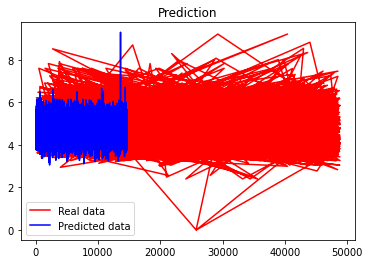

In [86]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [87]:
score = model.evaluate(x, y, verbose=0)
score

[0.2341189682483673, 0.0]

In [88]:
y_test

43813    5.420535
32734    6.476972
25276    5.707110
36084    3.295837
17736    4.836282
           ...   
48122    4.248495
42652    5.398163
22776    5.298317
43308    5.017280
3473     5.252273
Name: price_log, Length: 14669, dtype: float64

In [89]:
y_pred

array([[5.499497 ],
       [5.610182 ],
       [5.1617594],
       ...,
       [4.7528477],
       [5.364662 ],
       [5.2509327]], dtype=float32)